# Salary Hike of each employee

In [1]:
# Import libraries necessary for this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from transformers import pipeline
from tqdm import tqdm

# Plots are displayed inline without needing to call 'plt.show()'
%matplotlib inline

In [2]:
df=pd.read_csv('IBM-HR-Employee_Processed_Data.csv')
df.head(20)

,EmployeeNumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,Sales,1,2,Female,Sales Executive,4,...,8,Yes,1,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,Research & Development,8,3,Male,Research Scientist,2,...,1,No,4,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,Research & Development,2,4,Male,Laboratory Technician,3,...,6,Yes,2,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,Research & Development,3,4,Female,Research Scientist,3,...,1,Yes,3,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,Research & Development,2,1,Male,Laboratory Technician,2,...,9,No,4,6,3,3,2,2,2,2
5,6,32,No,Travel_Frequently,Research & Development,2,4,Male,Laboratory Technician,4,...,0,No,3,8,2,2,7,7,3,6
6,7,59,No,Travel_Rarely,Research & Development,3,3,Female,Laboratory Technician,1,...,4,Yes,1,12,3,2,1,0,0,0
7,8,30,No,Travel_Rarely,Research & Development,24,4,Male,Laboratory Technician,3,...,1,No,2,1,2,3,1,0,0,0
8,9,38,No,Travel_Frequently,Research & Development,23,4,Male,Manufacturing Director,3,...,0,No,2,10,2,3,9,7,1,8
9,10,36,No,Travel_Rarely,Research & Development,27,3,Male,Healthcare Representative,3,...,6,No,2,17,3,2,7,7,7,7


In [3]:
df.columns

Index(['EmployeeNumber', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'EnvironmentSatisfaction', 'Gender', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df["Age"].max()

60

In [5]:
# Convert categorical columns to numeric codes
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

In [6]:
df.head()

,EmployeeNumber,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobRole,JobSatisfaction,...,NumCompaniesWorked,OverTime,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,2,2,1,2,0,7,4,...,8,1,1,8,0,1,6,4,0,5
1,2,49,0,1,1,8,3,1,6,2,...,1,0,4,10,3,3,10,7,1,7
2,3,37,1,2,1,2,4,1,2,3,...,6,1,2,7,3,3,0,0,0,0
3,4,33,0,1,1,3,4,0,6,3,...,1,1,3,8,3,3,8,7,3,0
4,5,27,0,2,1,2,1,1,2,2,...,9,0,4,6,3,3,2,2,2,2


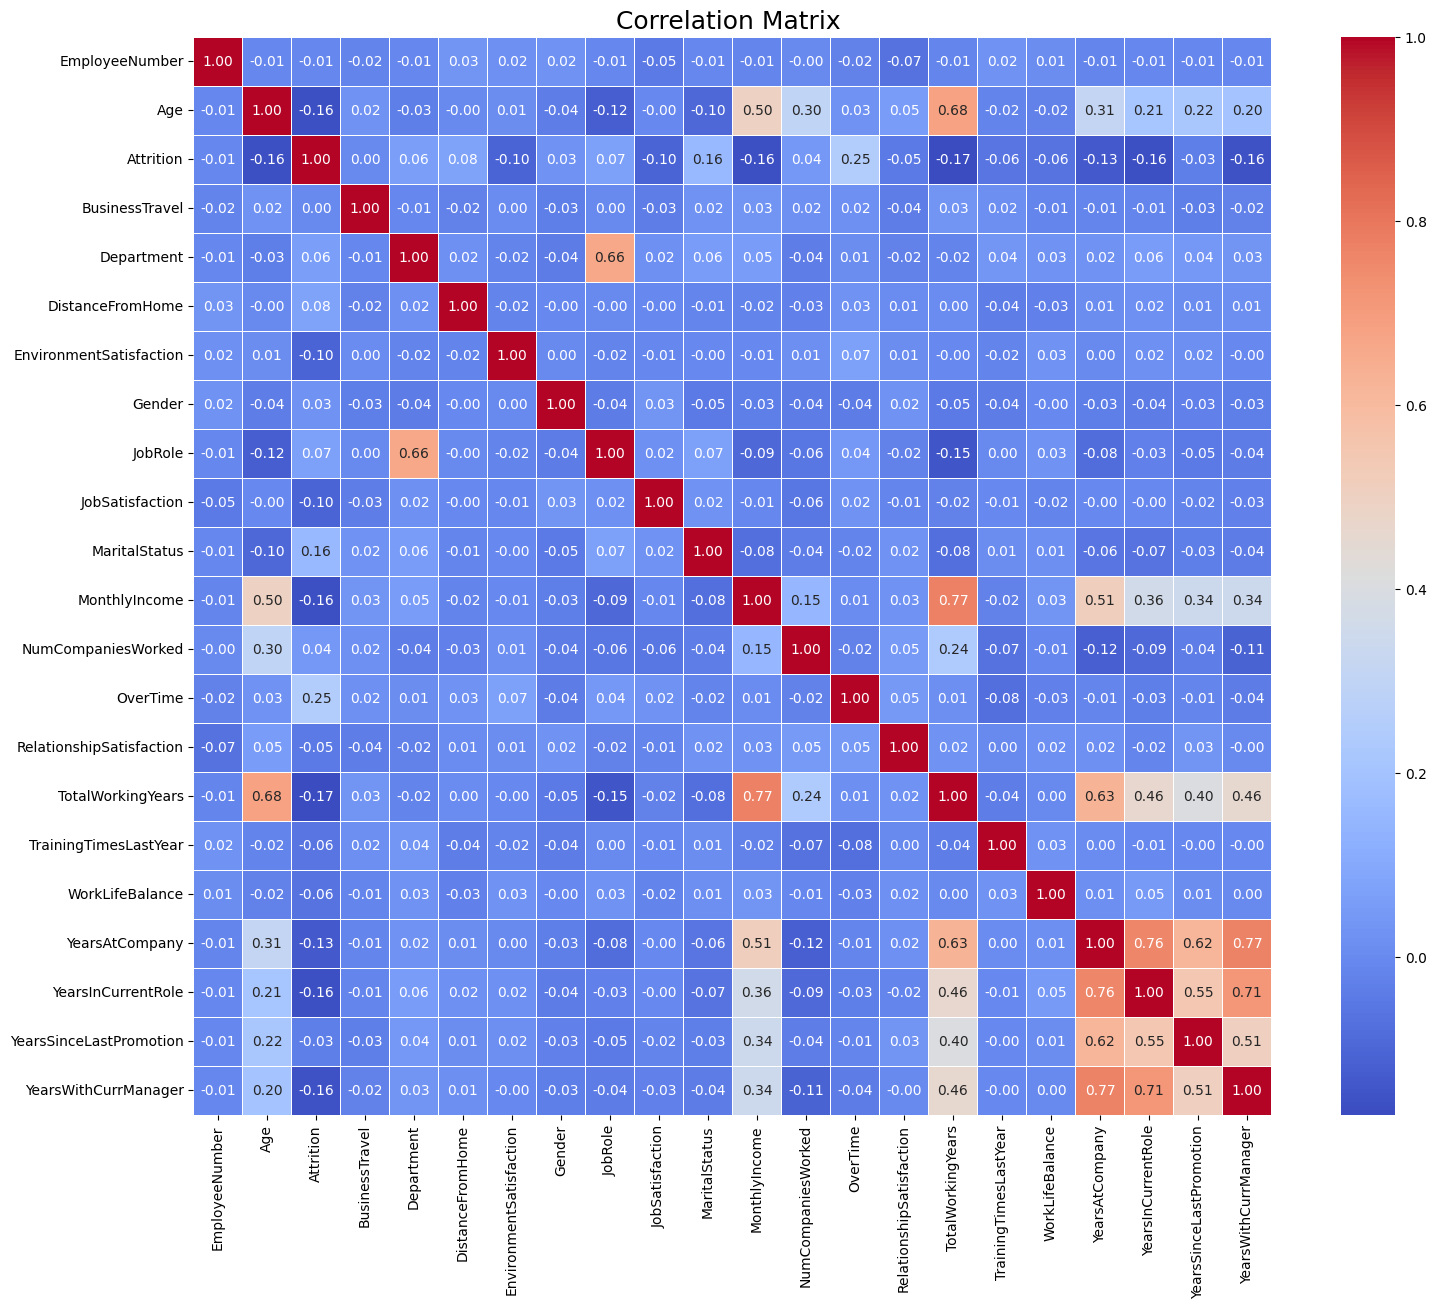

In [7]:
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Add title
plt.title('Correlation Matrix ', fontsize=18)
plt.show()

## Value of each employee

In [8]:
from sklearn.preprocessing import MinMaxScaler

# -----------------------------
# Selected features for employee value rating
# -----------------------------
selected_features = [
    'MonthlyIncome',
    'TrainingTimesLastYear',
    'OverTime',            # encode if categorical
    'BusinessTravel',      # encode if categorical
    'JobSatisfaction', 
    'EnvironmentSatisfaction', 
    'RelationshipSatisfaction', 
    'WorkLifeBalance',
    'TotalWorkingYears', 
    'YearsAtCompany', 
    'YearsSinceLastPromotion', 
    'YearsWithCurrManager'
]

# -----------------------------
# Normalize features (0-1)
# -----------------------------
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[selected_features] = scaler.fit_transform(df_scaled[selected_features])

# -----------------------------
# Step 1: Calculate standard deviation
# -----------------------------
std_dev = df_scaled[selected_features].std()

# -----------------------------
# Step 2: Correlation matrix
# -----------------------------
corr_matrix = df_scaled[selected_features].corr()

# -----------------------------
# Step 3: Calculate CRITIC scores (CRiteria Importance Through Intercriteria Correlation)
# -----------------------------
critic_scores = {}
for feature in selected_features:
    contrast = std_dev[feature]                    # standard deviation
    conflict = (1 - corr_matrix[feature]).sum()    # conflict with other features
    critic_scores[feature] = contrast * conflict

# -----------------------------
# Step 4: Normalize CRITIC scores to get weights
# -----------------------------
total_score = sum(critic_scores.values())
weights = {k: v / total_score for k, v in critic_scores.items()}

print("Feature Weights (CRITIC):")
for feature, weight in sorted(weights.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {weight:.4f}")

# -----------------------------
# Step 5: Calculate weighted employee value rating as Value_of_Employee
# -----------------------------
df_scaled['Value_of_Employee'] = 0
for feature in selected_features:
    df_scaled['Value_of_Employee'] += df_scaled[feature] * weights[feature]

# -----------------------------
# Step 6: Scale Value_of_Employee to 1-10 (keep decimal precision)
# -----------------------------
df_scaled['Value_of_Employee'] = 1 + (df_scaled['Value_of_Employee'] - df_scaled['Value_of_Employee'].min()) / \
                                 (df_scaled['Value_of_Employee'].max() - df_scaled['Value_of_Employee'].min()) * 9

# Handle any potential NaN or inf values
df_scaled['Value_of_Employee'] = df_scaled['Value_of_Employee'].replace([np.inf, -np.inf], np.nan)
df_scaled['Value_of_Employee'] = df_scaled['Value_of_Employee'].fillna(1)

# ✅ Round to 2 decimal places (not integer)
df_scaled['Value_of_Employee'] = df_scaled['Value_of_Employee'].round(2)

# -----------------------------
# Display results
# -----------------------------
print("\nValue_of_Employee (1-10) for all employees:")
print(df_scaled[['EmployeeNumber', 'Value_of_Employee']])

# -----------------------------
# Save to CSV with 2 decimal places
# -----------------------------
df_scaled[['EmployeeNumber', 'Value_of_Employee']].to_csv('Employee_Value.csv', index=False, float_format='%.2f')


Feature Weights (CRITIC):
OverTime: 0.1430
JobSatisfaction: 0.1181
EnvironmentSatisfaction: 0.1148
RelationshipSatisfaction: 0.1131
BusinessTravel: 0.1061
WorkLifeBalance: 0.0743
TrainingTimesLastYear: 0.0690
MonthlyIncome: 0.0641
YearsSinceLastPromotion: 0.0566
YearsWithCurrManager: 0.0546
TotalWorkingYears: 0.0490
YearsAtCompany: 0.0374

Value_of_Employee (1-10) for all employees:
      EmployeeNumber  Value_of_Employee
0                  1               5.91
1                  2               5.61
2                  3               7.35
3                  4               7.44
4                  5               4.98
...              ...                ...
1465            1466               5.84
1466            1467               5.31
1467            1468               5.91
1468            1469               5.86
1469            1470               4.87

[1470 rows x 2 columns]


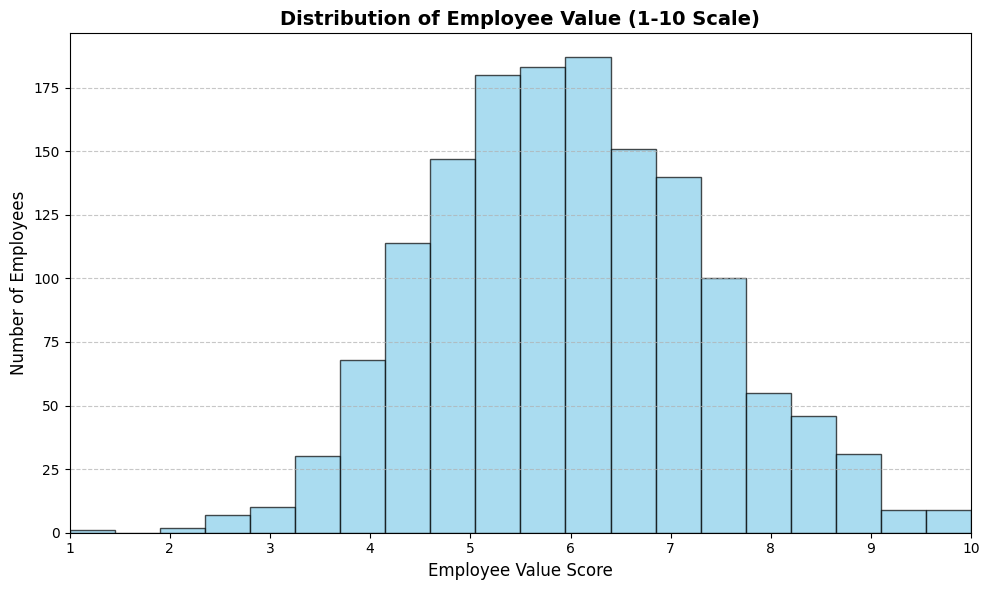

In [9]:
import matplotlib.pyplot as plt

# -----------------------------
# Plot Distribution of Value_of_Employee
# -----------------------------
plt.figure(figsize=(10, 6))
plt.hist(df_scaled['Value_of_Employee'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Employee Value (1-10 Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Employee Value Score', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(1, 10)
plt.xticks([i for i in range(1, 11)])
plt.tight_layout()

# Display the plot
plt.show()



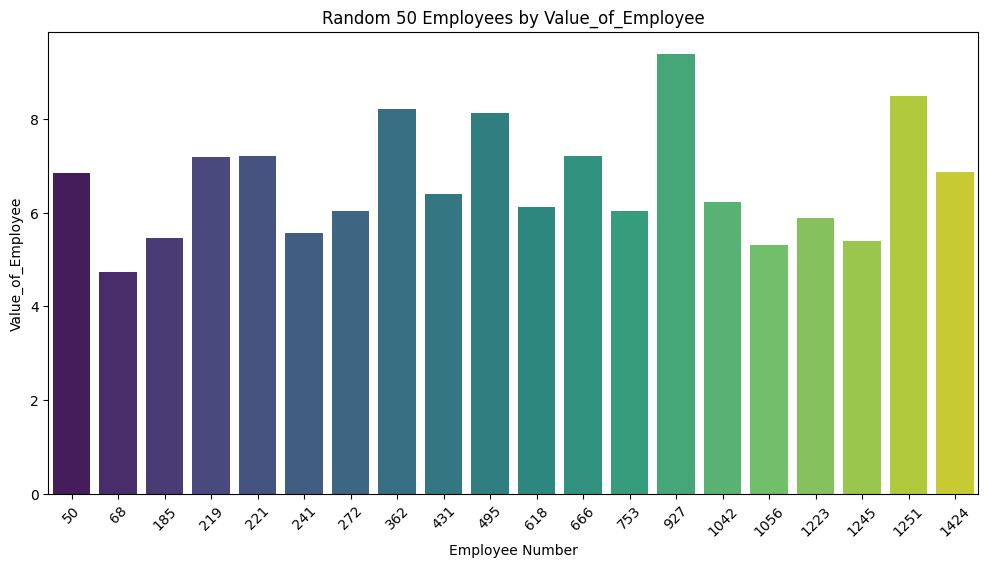

In [10]:
# Randomly sample 50 employees
sample_df = df_scaled.sample(n=20, random_state=42)

# Plot their Value_of_Employee
plt.figure(figsize=(12,6))
sns.barplot(x='EmployeeNumber', y='Value_of_Employee', data=sample_df, palette='viridis')
plt.title('Random 50 Employees by Value_of_Employee')
plt.xlabel('Employee Number')
plt.ylabel('Value_of_Employee')
plt.xticks(rotation=45)
plt.show()


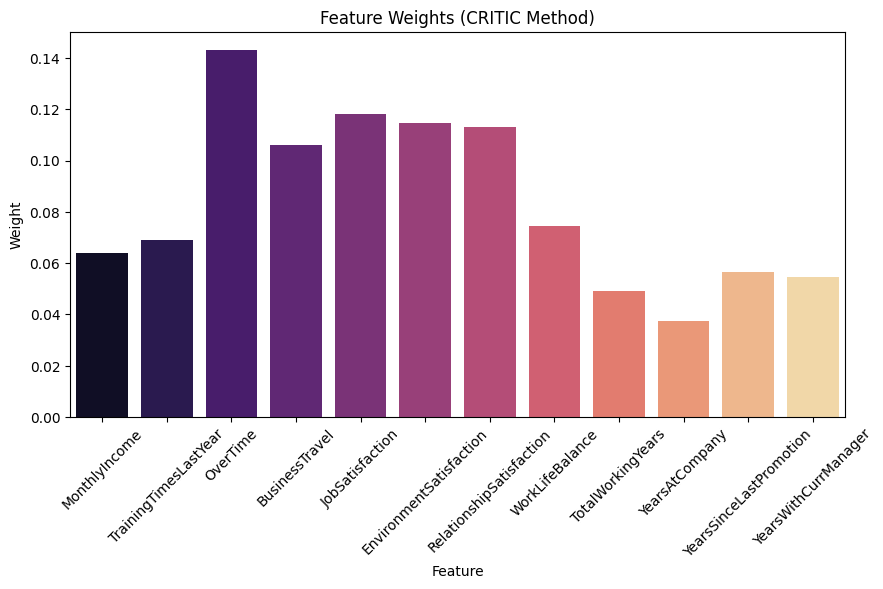

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(weights.keys()), y=list(weights.values()), palette='magma')
plt.title('Feature Weights (CRITIC Method)')
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.xticks(rotation=45)
plt.show()


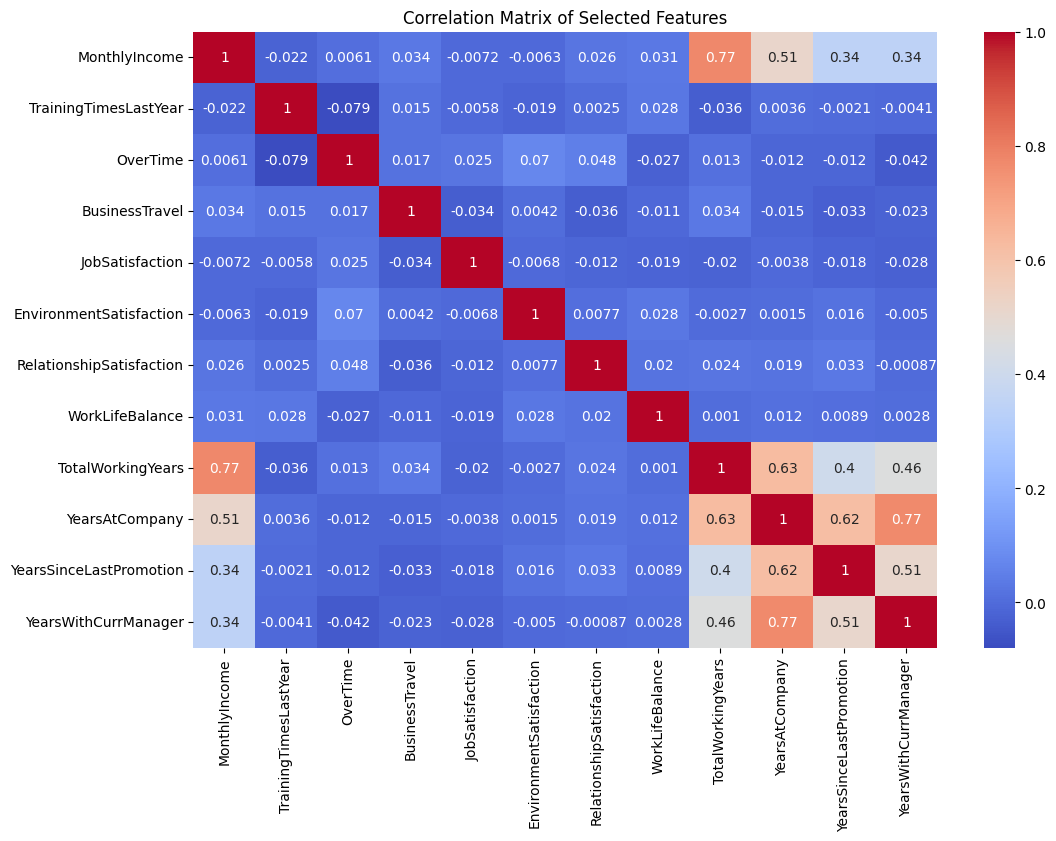

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df_scaled[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()


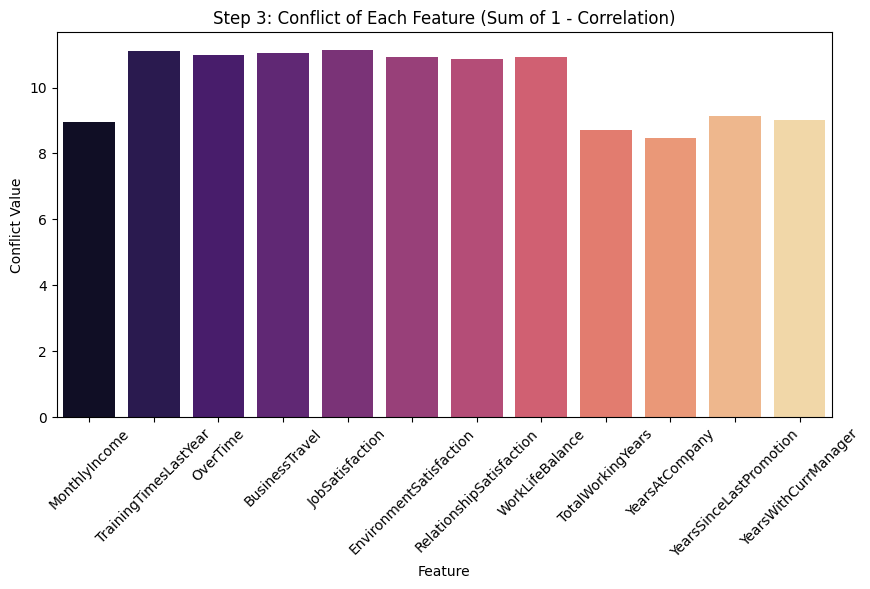

In [13]:
conflict_values = {}
for feature in selected_features:
    conflict_values[feature] = (1 - corr_matrix[feature]).sum()

plt.figure(figsize=(10,5))
sns.barplot(x=list(conflict_values.keys()), y=list(conflict_values.values()), palette='magma')
plt.title('Step 3: Conflict of Each Feature (Sum of 1 - Correlation)')
plt.xlabel('Feature')
plt.ylabel('Conflict Value')
plt.xticks(rotation=45)
plt.show()


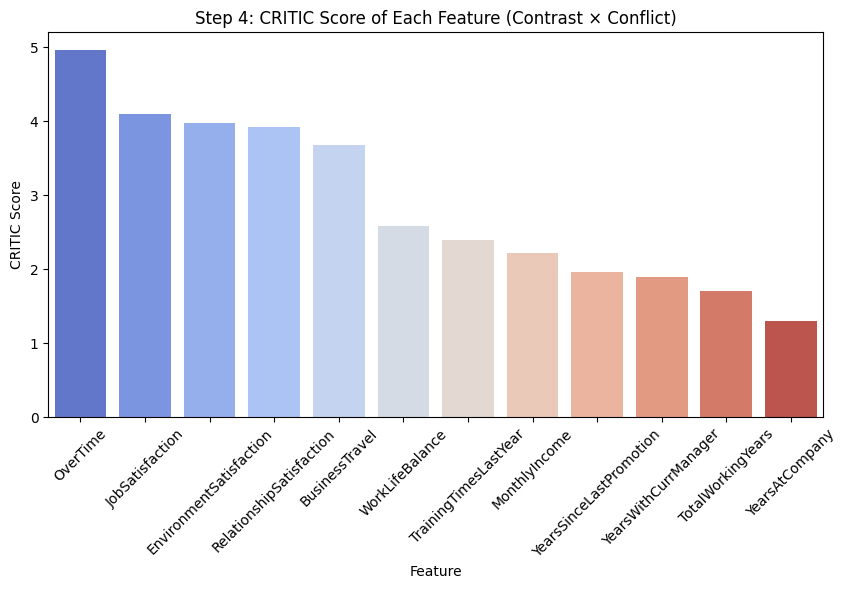

In [14]:
critic_scores_series = pd.Series(critic_scores).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=critic_scores_series.index, y=critic_scores_series.values, palette='coolwarm')
plt.title('Step 4: CRITIC Score of Each Feature (Contrast × Conflict)')
plt.xlabel('Feature')
plt.ylabel('CRITIC Score')
plt.xticks(rotation=45)
plt.show()


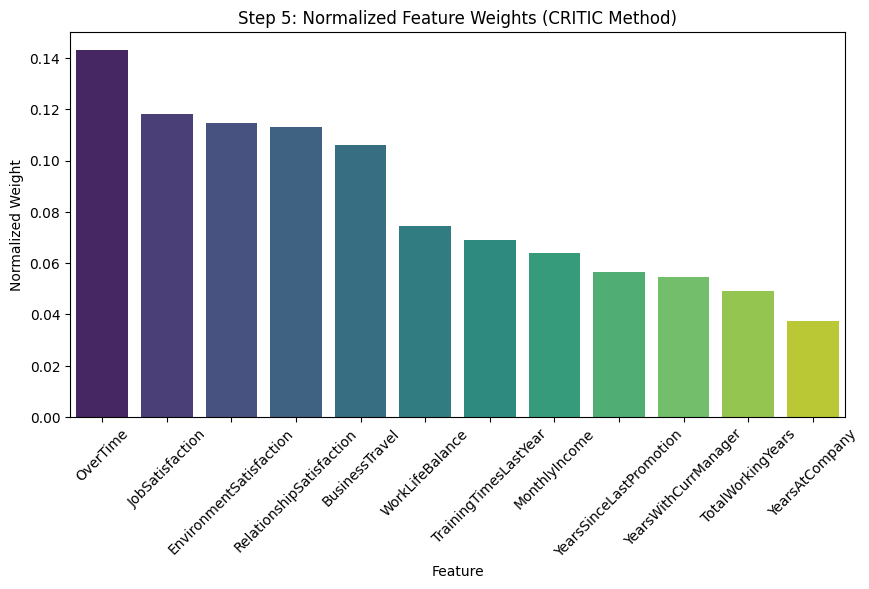

In [15]:
weights_series = pd.Series(weights).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=weights_series.index, y=weights_series.values, palette='viridis')
plt.title('Step 5: Normalized Feature Weights (CRITIC Method)')
plt.xlabel('Feature')
plt.ylabel('Normalized Weight')
plt.xticks(rotation=45)
plt.show()


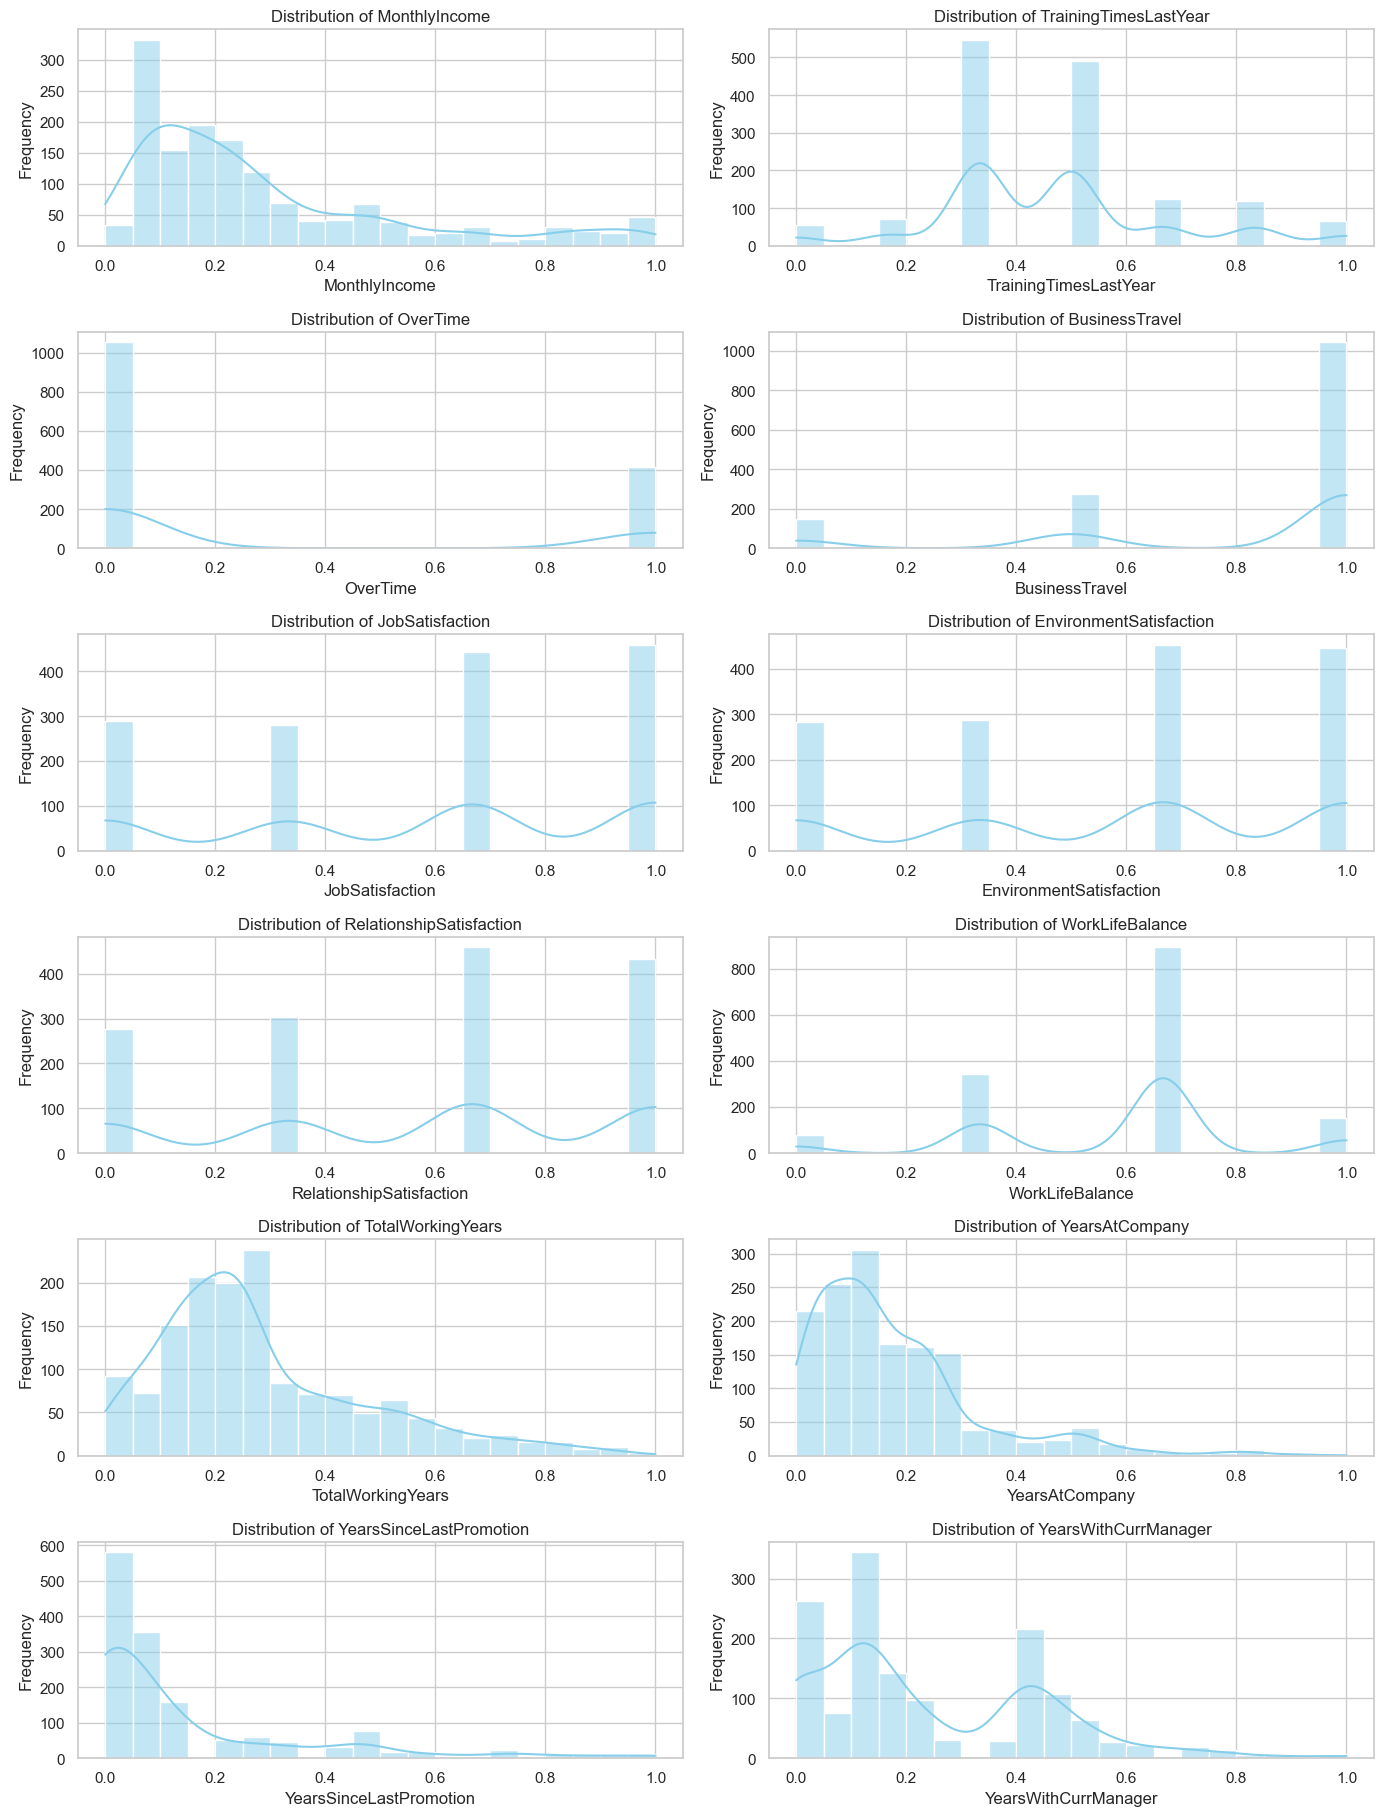

In [16]:
# Set plot style
sns.set(style="whitegrid")

# Number of features
num_features = len(selected_features)

# Create a figure with subplots (2 columns)
plt.figure(figsize=(14, num_features*3))

for i, feature in enumerate(selected_features):
    plt.subplot(num_features, 2, i+1)  # rows=num_features, cols=2
    sns.histplot(df_scaled[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Salary Hike

In [17]:
# ===========================================================
# CONFIGURATION
# ===========================================================
# Inputs: 
# - df : original HR dataset
# - df_scaled : dataset with Value_of_Employee (2 decimal points)
# - Sentiment_Results.csv : has Employee_id and Overall_Sentiment columns
# ===========================================================

# Combine Employee Value and main HR data
combined = df.copy()
combined['Value_of_Employee'] = df_scaled['Value_of_Employee']

# Load sentiment results
sentiment_df = pd.read_csv('Sentiment_Analysis_Results.csv')

# Merge on Employee ID if available
if 'Employee_id' in combined.columns and 'Employee_id' in sentiment_df.columns:
    combined = combined.merge(
        sentiment_df[['Employee_id', 'Overall_Sentiment']],
        on='Employee_id', how='left'
    )
else:
    combined['Overall_Sentiment'] = 'NEUTRAL'


# ===========================================================
# HELPER FUNCTIONS
# ===========================================================
def wants_to_leave(val):
    """Interpret Attrition column robustly."""
    if pd.isna(val):
        return False
    if isinstance(val, (int, np.integer, float, np.floating)):
        return int(val) == 1
    s = str(val).strip().lower()
    return s in ('yes', 'y', 'true', '1')


def classify_importance(value):
    """Classify employee based on Value_of_Employee score."""
    if value >= 7.0:
        return 'Very Important'
    elif 5.7 <= value < 7.0:
        return 'Less Valuable'
    else:
        return 'Not Valuable'


# ===========================================================
# BASE HIKE MAPPING BASED ON IMPORTANCE
# ===========================================================
base_hike_map_important = {7: 10.0, 8: 15.0, 9: 20.0, 10: 25.0}
base_hike_less = 5.0  # for less valuable employees
median_income = combined['MonthlyIncome'].median()


# ===========================================================
# SALARY HIKE CALCULATION
# ===========================================================
def calculate_salary_hike(row):
    value_score = row.get('Value_of_Employee', 0)
    importance = classify_importance(value_score)
    attrition_flag = wants_to_leave(row.get('Attrition', None))
    sentiment = str(row.get('Overall_Sentiment', 'NEUTRAL')).upper()

    # Determine hike eligibility
    if attrition_flag and importance in ['Very Important', 'Less Valuable']:
        eligible = "Yes"
    else:
        eligible = "No"

    # Default hike = 0
    if eligible == "No":
        return 0.0, eligible

    # Determine base hike
    val_int = int(np.floor(value_score))
    if importance == 'Very Important':
        base = base_hike_map_important.get(val_int, 0.0)
    elif importance == 'Less Valuable':
        base = base_hike_less
    else:
        base = 0.0

    # Loyalty bonus
    yrs = row.get('YearsAtCompany', 0)
    if pd.isna(yrs): yrs = 0
    loyalty_bonus = 2.0 if yrs > 5 else (1.0 if yrs > 2 else 0.0)

    # Training bonus
    training_times = row.get('TrainingTimesLastYear', 0)
    if pd.isna(training_times): training_times = 0
    training_bonus = max(0, training_times - 1) * 0.5

    # Promotion delay bonus
    years_since_promo = row.get('YearsSinceLastPromotion', 0)
    if pd.isna(years_since_promo): years_since_promo = 0
    promo_delay_bonus = 1.0 if years_since_promo > 3 else 0.0

    # Overtime bonus
    overtime_flag = row.get('OverTime', 0)
    overtime_bonus = 1.0 if (overtime_flag == 1 or str(overtime_flag).strip().lower() in ('yes', 'y', 'true', '1')) else 0.0

    # Income equity adjustment
    monthly = row.get('MonthlyIncome', np.nan)
    if pd.isna(monthly) or median_income == 0:
        income_adj = 0.0
    else:
        rel = (median_income - monthly) / median_income
        income_adj = np.clip(rel * 5.0, -2.0, 5.0)

    # Sentiment adjustment logic
    if sentiment == 'NEGATIVE':
        sentiment_bonus = 4.0
    elif sentiment == 'NEUTRAL':
        sentiment_bonus = 2.0
    elif sentiment == 'POSITIVE':
        sentiment_bonus = 1.0
    else:
        sentiment_bonus = 0.0

    # Final hike calculation
    hike_pct = base + loyalty_bonus + training_bonus + promo_delay_bonus + overtime_bonus + income_adj + sentiment_bonus
    hike_pct = np.clip(hike_pct, 0, 40)

    return round(hike_pct, 2), eligible


# ===========================================================
# APPLY FUNCTION
# ===========================================================
importance_levels = []
eligibility_flags = []
hike_values = []

for _, row in combined.iterrows():
    value_score = row.get('Value_of_Employee', 0)
    importance = classify_importance(value_score)
    importance_levels.append(importance)
    
    hike, eligible = calculate_salary_hike(row)
    hike_values.append(hike)
    eligibility_flags.append(eligible)

combined['Importance_Level'] = importance_levels
combined['Eligible_For_Hike'] = eligibility_flags
combined['Recommended_Hike_pct'] = hike_values
combined['New_MonthlyIncome'] = combined['MonthlyIncome'] * (1 + combined['Recommended_Hike_pct'] / 100.0)


# ===========================================================
# SAVE AND DISPLAY
# ===========================================================
combined.to_csv('Salary_Hike_of_Each_Employee.csv', index=False)

print("\n================ SALARY HIKE SUMMARY ================\n")
print("Importance Levels:")
print(combined['Importance_Level'].value_counts())

print("\nEligibility for Hike:")
print(combined['Eligible_For_Hike'].value_counts())

print("\nSentiment Distribution:")
print(combined['Overall_Sentiment'].value_counts())

print("\nHike Percentage Stats (Eligible Employees):")
print(combined.loc[combined['Eligible_For_Hike']=="Yes", 'Recommended_Hike_pct'].describe().round(2))

print("\nSample Output (first 15 employees):")
print(combined[['EmployeeNumber', 'Value_of_Employee', 'Importance_Level', 'Attrition',
                'Overall_Sentiment', 'Eligible_For_Hike', 'MonthlyIncome',
                'Recommended_Hike_pct', 'New_MonthlyIncome', 'YearsAtCompany',
                'TrainingTimesLastYear', 'YearsSinceLastPromotion', 'OverTime']].head(15))



================ SALARY HIKE SUMMARY ================

Importance Levels:
Importance_Level
Not Valuable      630
Less Valuable     493
Very Important    347
Name: count, dtype: int64

Eligibility for Hike:
Eligible_For_Hike
No     1335
Yes     135
Name: count, dtype: int64

Sentiment Distribution:
Overall_Sentiment
NEUTRAL    1470
Name: count, dtype: int64

Hike Percentage Stats (Eligible Employees):
count    135.00
mean      13.73
std        4.27
min        6.50
25%       10.73
50%       12.97
75%       16.84
max       29.50
Name: Recommended_Hike_pct, dtype: float64

Sample Output (first 15 employees):
    EmployeeNumber  Value_of_Employee Importance_Level  Attrition  \
0                1               5.91    Less Valuable          1   
1                2               5.61     Not Valuable          0   
2                3               7.35   Very Important          1   
3                4               7.44   Very Important          0   
4                5               4.98     

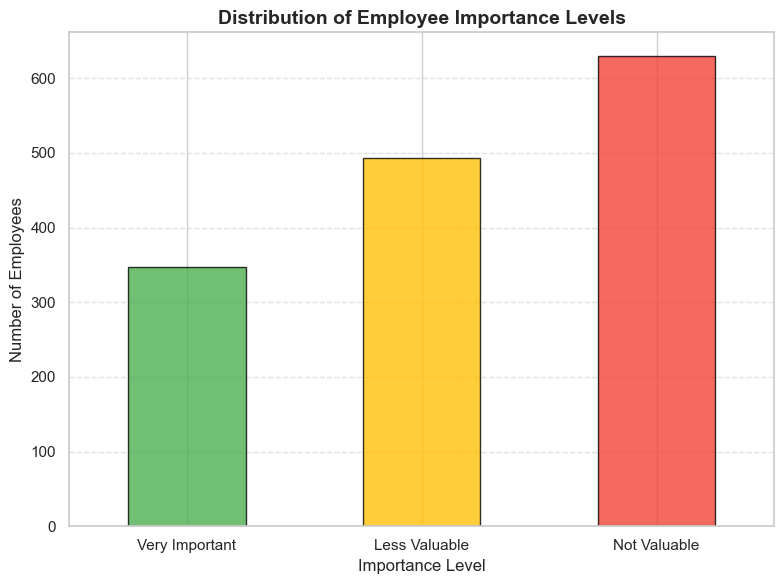

In [18]:
import matplotlib.pyplot as plt

# -----------------------------
# Plot Distribution of Employee Importance Levels
# -----------------------------
importance_counts = combined['Importance_Level'].value_counts().reindex(['Very Important', 'Less Valuable', 'Not Valuable'], fill_value=0)

plt.figure(figsize=(8, 6))
importance_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'], edgecolor='black', alpha=0.8)
plt.title('Distribution of Employee Importance Levels', fontsize=14, fontweight='bold')
plt.xlabel('Importance Level', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Display the plot
plt.show()


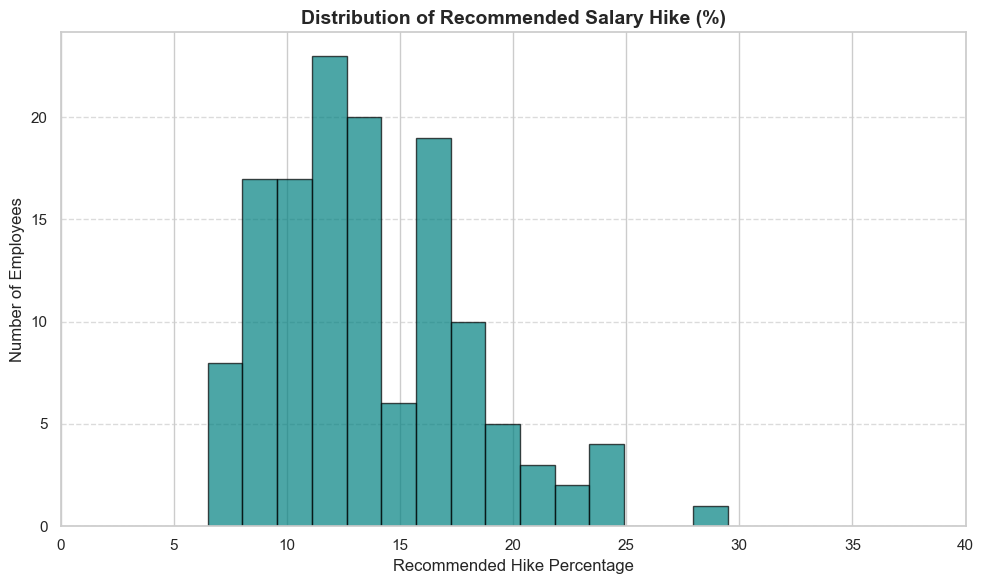

In [19]:
import matplotlib.pyplot as plt

# -----------------------------
# Plot Distribution of Recommended Salary Hike Percentages
# -----------------------------
# Filter only eligible employees
eligible_hikes = combined[combined['Eligible_For_Hike'] == 'Yes']['Recommended_Hike_pct']

plt.figure(figsize=(10, 6))
plt.hist(eligible_hikes, bins=15, color='teal', edgecolor='black', alpha=0.7)
plt.title('Distribution of Recommended Salary Hike (%)', fontsize=14, fontweight='bold')
plt.xlabel('Recommended Hike Percentage', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 40)
plt.xticks(range(0, 41, 5))
plt.tight_layout()

# Display the plot
plt.show()


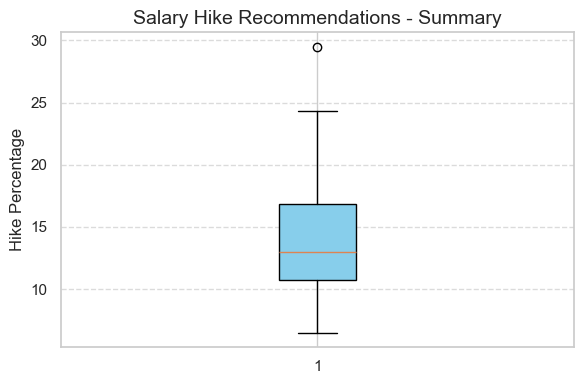

In [20]:
# Box plot of recommended hike percentages
plt.figure(figsize=(6, 4))
plt.boxplot(eligible_hikes, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.title('Salary Hike Recommendations - Summary', fontsize=14)
plt.ylabel('Hike Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
